In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# 正常显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示符号
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('./DataSets/DynamicBloodGlucoseData.csv',index_col=0)

In [ ]:
data.head()

,blood_sugar,dateline
375740,12.0,1493360446
375741,12.0,1493360266
377965,12.4,1493436143
377968,12.4,1493436323
377970,12.4,1493436503


In [5]:
X_train = data['dateline'].values.reshape(-1, 1)

In [6]:
y_train = data['blood_sugar'].values

### data processing
Converts a time stamp into an hour
把时间戳转成小时为单位的时间


In [7]:
import time_transform
for i in range(len(X_train)):
    X_train[i] = int(time_transform.stamp2str(X_train[i],strTimeFormat="%H"))

### 一元线性回归(Unary linear regression)

Text(0,0.5,'blood glucose value')

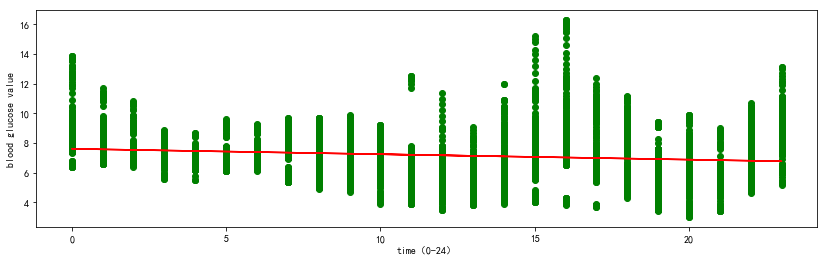

In [11]:
from sklearn import linear_model
import matplotlib.pyplot as plt
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
plt.figure(figsize=(14,4))
plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, y_pred, color='r')
plt.xlabel('time（0-24）')
plt.ylabel('blood glucose value')

### 多元线性回归(Multiple linear regression)

Text(0,0.5,'blood glucose value')

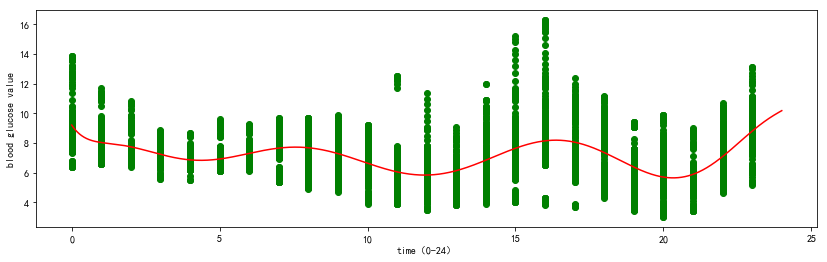

In [10]:
pf = PolynomialFeatures(degree=10)
regr2 = linear_model.LinearRegression()
regr2.fit(pf.fit_transform(X_train),y_train)

X_predict = np.linspace(0, 24, 1440)

X_predict_result = regr2.predict(pf.transform(X_predict.reshape(X_predict.shape[0], 1)))
plt.figure(figsize=(14,4))
plt.scatter(X_train, y_train, color='g')
plt.plot(X_predict, X_predict_result, 'r-')
plt.xlabel('time（0-24）')
plt.ylabel('blood glucose value')